In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import scipy.stats as stats

# visualization stuff
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
pd.set_option('display.max_columns', None) #force display of all the feature columns
np.set_printoptions(precision=3, suppress=True) #print full numbers, 3 dec points, instead of scientific notation

In [3]:
IRS14Data = pd.read_csv("data/py14_990pf.dat", sep=" ")

In [4]:
IRS14Data.shape

#original dataframe shape is (101381, 178)

(101381, 178)

In [5]:
IRS14Data.describe()

,EIN,TAX_PRD,EOSTATUS,TAX_YR,SUBCD,FAIRMRKTVALAMT,GRSCONTRGIFTS,INTRSTRVNUE,DIVIDNDSAMT,GRSRENTS,GRSSLSPRAMT,COSTSOLD,GRSPROFITBUS,OTHERINCAMT,TOTRCPTPERBKS,COMPOFFICERS,PENSPLEMPLBENF,LEGALFEESAMT,ACCOUNTINGFEES,INTERESTAMT,DEPRECIATIONAMT,OCCUPANCYAMT,TRAVLCONFMTNGS,PRINTINGPUBL,TOPRADMNEXPNSA,CONTRPDPBKS,TOTEXPNSPBKS,EXCESSRCPTS,TOTRCPTNETINC,TOPRADMNEXPNSB,TOTEXPNSNETINC,NETINVSTINC,TRCPTADJNETINC,TOTEXPNSADJNET,ADJNETINC,TOPRADMNEXPNSD,TOTEXPNSEXEMPT,OTHRCASHAMT,INVSTGOVTOBLIG,INVSTCORPSTK,INVSTCORPBND,TOTINVSTSEC,MRTGLOANS,OTHRINVSTEND,OTHRASSETSEOY,TOTASSETSEND,MRTGNOTESPAY,OTHRLIABLTSEOY,TOTLIABEND,TFUNDNWORTH,FAIRMRKTVALEOY,TOTEXCAPGNLS,TOTEXCAPGN,TOTEXCAPLS,INVSTEXCISETX,SECT511TX,SUBTITLEATX,TOTAXPYR,ESTTAXCR,TXWITHLDSRC,TXPAIDF2758,ERRONBKUPWTHLD,ESTPNLTY,TAXDUE,OVERPAY,CRELAMT,TFAIRMRKTUNUSE,VALNCHARITASSETS,CMPMININVSTRET,DISTRIBAMT,UNDISTRIBINCYR,ADJNETINCCOLA,ADJNETINCCOLB,ADJNETINCCOLC,ADJNETINCCOLD,ADJNETINCTOT,QLFYDISTRIBA,QLFYDISTRIBB,QLFYDISTRIBC,QLFYDISTRIBD,QLFYDISTRIBTOT,VALASSETSCOLA,VALASSETSCOLB,VALASSETSCOLC,VALASSETSCOLD,VALASSETSTOT,QLFYASSETA,QLFYASSETB,QLFYASSETC,QLFYASSETD,QLFYASSETTOT,ENDWMNTSCOLA,ENDWMNTSCOLB,ENDWMNTSCOLC,ENDWMNTSCOLD,ENDWMNTSTOT,TOTSUPRTCOLA,TOTSUPRTCOLB,TOTSUPRTCOLC,TOTSUPRTCOLD,TOTSUPRTTOT,PUBSUPRTCOLA,PUBSUPRTCOLB,PUBSUPRTCOLC,PUBSUPRTCOLD,PUBSUPRTTOT,GRSINVSTINCA,GRSINVSTINCB,GRSINVSTINCC,GRSINVSTINCD,GRSINVSTINCTOT,GRNTAPPRVFUT,PROGSRVCACOLD,PROGSRVCACOLE,PROGSRVCBCOLD,PROGSRVCBCOLE,PROGSRVCCCOLD,PROGSRVCCCOLE,PROGSRVCDCOLD,PROGSRVCDCOLE,PROGSRVCECOLD,PROGSRVCECOLE,PROGSRVCFCOLD,PROGSRVCFCOLE,PROGSRVCGCOLD,PROGSRVCGCOLE,MEMBERSHPDUESD,MEMBERSHPDUESE,INTONSVNGSD,INTONSVNGSE,DVDNDSINTD,DVDNDSINTE
count,1.013810e+05,101381.000000,101381.000000,101381.000000,101381.000000,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013800e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,101381.000000,101381.000000,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,101381.000000,101381.000000,101381.000000,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,101381.000000,1.013810e+05,1.013810e+05,101381.000000,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05,1.013810e+05
mean,4.026936e+08,201316.938884,1.674120,2012.815468,8.319932,8.615635e+06,5.402371e+05,7.798977e+03,1.237013e+05,9.931978e+03,2.859644e+06,2.210815e+03,1.771892e+03,5.977559e+04,1.075685e+06,1.400659e+04,6.728422e+03,2.308283e+03,3.000788e+03,3.147178e+03,6.190886e+03,4.418924e+03,3.986218e+03,5.683157e+02,1.588260e+05,5.726771e+05,7.315175e+05,3.441673e+05,5.220368e+05,4.601780e+04,4.614119e+04,4.769080e+05,3.497403e+04,1.453391e+04,2.248329e+04,8.536866e+04,6.117566e+05,9.690554e+04,2.328441e+05,2.568175e+06,3.726696e+05,3.173689e+06,1.081612e+04,3.337170e+06,2.980368e+05,7.677

In [6]:
#print IRS14Data.dtypes

In [4]:
#set EIN as the index
IRS14Data.set_index(["EIN"], inplace=True)


In [5]:
#stats about CONTRPDPBKS (disbursements made)
IRS14Data.CONTRPDPBKS.describe()

#sns.plt.hist(IRS14Data.CONTRPDPBKS)


count    1.013810e+05
mean     5.726771e+05
std      1.890874e+07
min     -1.404627e+06
25%      4.000000e+03
50%      2.900000e+04
75%      1.191030e+05
max      4.108470e+09
Name: CONTRPDPBKS, dtype: float64

In [18]:
IRS14Data.CONTRPDPBKS.nlargest(10)

EIN
911663695    4108470000
562618866    3392343410
986038021     998473298
223622487     811433684
261215559     783366952
311520982     711632110
460500266     690886838
10575520      686800564
476032365     673777153
261437283     668050404
Name: CONTRPDPBKS, dtype: int64

In [11]:
IRS14Data.CONTRPDPBKS.nsmallest(10)

EIN
597033503   -1404627
136084636     -93663
222790422     -25450
136181425     -23450
208913138      -6500
237927519      -5000
460498125      -3000
330301860      -2500
330973055      -1190
464881149      -1000
Name: CONTRPDPBKS, dtype: int64

In [22]:
print "Mean of CONTRPDPBKS:", IRS14Data.CONTRPDPBKS.mean()
print "Median of CONTRPDPBKS:", IRS14Data.CONTRPDPBKS.median()
print "Max of CONTRPDPBKS:", IRS14Data.CONTRPDPBKS.max()
print "Min of CONTRPDPBKS:",  IRS14Data.CONTRPDPBKS.min()

Mean of CONTRPDPBKS: 572677.081593
Median of CONTRPDPBKS: 29000.0
Max of CONTRPDPBKS: 4108470000
Min of CONTRPDPBKS: -1404627


In [9]:
#stats about DISTRIBAMT (distribution required)
IRS14Data.DISTRIBAMT.describe()

#sns.plt.hist(IRS14Data.DISTRIBAMT)

count    1.013810e+05
mean     3.165127e+05
std      7.504409e+06
min     -1.148055e+06
25%      6.650000e+02
50%      1.712700e+04
75%      7.927400e+04
max      1.899136e+09
Name: DISTRIBAMT, dtype: float64

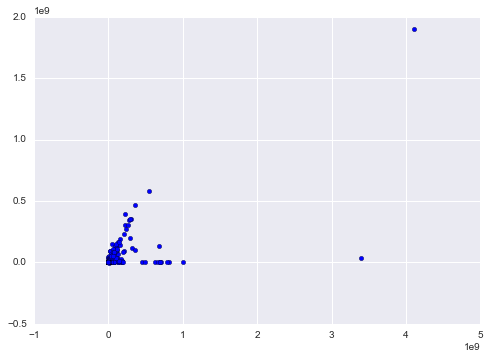

In [3]:
#scatterplot of DISTRIBAMT and CONTRPDPBKS

plt.scatter(IRS14Data.CONTRPDPBKS, IRS14Data.DISTRIBAMT)

In [ ]:
#groupby on IRS14Data.CONTRPDPBKS to see what the top 5 biggest are

In [10]:
#remove samples we don't need 

#remove benevolent life insurance associations (SUBCD = 92)
IRS14Data = IRS14Data[IRS14Data.SUBCD == 3]

print IRS14Data.SUBCD.value_counts()

#remove super late filed returns for years before 2011
IRS14Data = IRS14Data[IRS14Data.TAX_YR >= 2012]
print IRS14Data.TAX_YR.value_counts()


3    95321
Name: SUBCD, dtype: int64
2013    80054
2012    14075
Name: TAX_YR, dtype: int64


In [12]:
#convert Y/N objects into ints 

YN_convert = {"N":0, "Y":1}

IRS14Data['OPERATINGCD'] = IRS14Data['OPERATINGCD'].replace(YN_convert)
IRS14Data['SCHEDBIND'] = IRS14Data['SCHEDBIND'].replace(YN_convert)
IRS14Data['INFLEG'] = IRS14Data['INFLEG'].replace(YN_convert)
IRS14Data['ACTNOTPR'] = IRS14Data['ACTNOTPR'].replace(YN_convert)
IRS14Data['CHGNPRVRPTCD'] = IRS14Data['CHGNPRVRPTCD'].replace(YN_convert)
IRS14Data['FILEDF990TCD'] = IRS14Data['FILEDF990TCD'].replace(YN_convert)
IRS14Data['CONTRACTNCD'] = IRS14Data['CONTRACTNCD'].replace(YN_convert)
IRS14Data['FURNISHCPYCD'] = IRS14Data['FURNISHCPYCD'].replace(YN_convert)
IRS14Data['CLAIMSTATCD'] = IRS14Data['CLAIMSTATCD'].replace(YN_convert)
IRS14Data['CNTRBTRSTXYRCD'] = IRS14Data['CNTRBTRSTXYRCD'].replace(YN_convert)
IRS14Data['ACQDRINDRINTCD'] = IRS14Data['ACQDRINDRINTCD'].replace(YN_convert)
IRS14Data['ORGCMPLYPUBCD'] = IRS14Data['ORGCMPLYPUBCD'].replace(YN_convert)
IRS14Data['FILEDLF1041IND'] = IRS14Data['FILEDLF1041IND'].replace(YN_convert)
IRS14Data['PROPEXCHCD'] = IRS14Data['PROPEXCHCD'].replace(YN_convert)
IRS14Data['BRWLNDMNYCD'] = IRS14Data['BRWLNDMNYCD'].replace(YN_convert)
IRS14Data['FURNGOODSCD'] = IRS14Data['FURNGOODSCD'].replace(YN_convert)
IRS14Data['PAIDCMPNCD'] = IRS14Data['PAIDCMPNCD'].replace(YN_convert)
IRS14Data['TRANSFERCD'] = IRS14Data['TRANSFERCD'].replace(YN_convert)
IRS14Data['AGREMKPAYCD'] = IRS14Data['AGREMKPAYCD'].replace(YN_convert)
IRS14Data['EXCEPTACTSIND'] = IRS14Data['EXCEPTACTSIND'].replace(YN_convert)
IRS14Data['PRIORACTVCD'] = IRS14Data['PRIORACTVCD'].replace(YN_convert)
IRS14Data['UNDISTRINCCD'] = IRS14Data['UNDISTRINCCD'].replace(YN_convert)
IRS14Data['APPLYPROVIND'] = IRS14Data['APPLYPROVIND'].replace(YN_convert)
IRS14Data['DIRINDIRINTCD'] = IRS14Data['DIRINDIRINTCD'].replace(YN_convert)
IRS14Data['EXCESSHLDCD'] = IRS14Data['EXCESSHLDCD'].replace(YN_convert)
IRS14Data['INVSTJEXMPTCD'] = IRS14Data['INVSTJEXMPTCD'].replace(YN_convert)
IRS14Data['PREVJEXMPTCD'] = IRS14Data['PREVJEXMPTCD'].replace(YN_convert)
IRS14Data['PROPGNDACD'] = IRS14Data['PROPGNDACD'].replace(YN_convert)
IRS14Data['IPUBELECTCD'] = IRS14Data['IPUBELECTCD'].replace(YN_convert)
IRS14Data['GRNTINDIVCD'] = IRS14Data['GRNTINDIVCD'].replace(YN_convert)
IRS14Data['NCHRTYGRNTCD'] = IRS14Data['NCHRTYGRNTCD'].replace(YN_convert)
IRS14Data['NRELIGIOUSCD'] = IRS14Data['NRELIGIOUSCD'].replace(YN_convert)
IRS14Data['EXCPTRANSIND'] = IRS14Data['EXCPTRANSIND'].replace(YN_convert)
IRS14Data['RFPRSNLBNFTIND'] = IRS14Data['RFPRSNLBNFTIND'].replace(YN_convert)
IRS14Data['PYPRSNLBNFTIND'] = IRS14Data['PYPRSNLBNFTIND'].replace(YN_convert)
IRS14Data['TRNSFRCASHCD'] = IRS14Data['TRNSFRCASHCD'].replace(YN_convert)
IRS14Data['TRNSOTHASSTSCD'] = IRS14Data['TRNSOTHASSTSCD'].replace(YN_convert)
IRS14Data['SALESASSTSCD'] = IRS14Data['SALESASSTSCD'].replace(YN_convert)
IRS14Data['PRCHSASSTSCD'] = IRS14Data['PRCHSASSTSCD'].replace(YN_convert)
IRS14Data['RENTLSFACLTSCD'] = IRS14Data['RENTLSFACLTSCD'].replace(YN_convert)
IRS14Data['REIMBRSMNTSCD'] = IRS14Data['REIMBRSMNTSCD'].replace(YN_convert)
IRS14Data['LOANSGUARCD'] = IRS14Data['LOANSGUARCD'].replace(YN_convert)
IRS14Data['PERFSERVICESCD'] = IRS14Data['PERFSERVICESCD'].replace(YN_convert)
IRS14Data['SHARNGASSTSCD'] = IRS14Data['SHARNGASSTSCD'].replace(YN_convert)
IRS14Data['SEC4940NOTXCD'] = IRS14Data['SEC4940NOTXCD'].replace(YN_convert)
IRS14Data['SEC4940REDTXCD'] = IRS14Data['SEC4940REDTXCD'].replace(YN_convert)


print IRS14Data["SHARNGASSTSCD"].dtypes



int64


In [13]:
IRS14Data.TOTLIABEND.fillna(0, inplace=True)  #this column has NANs in it. replace all the NANs with zeros. 

In [14]:
#create column showing the difference between actual distribution and required distribution
IRS14Data["DIST_DELTA"] = IRS14Data["CONTRPDPBKS"] - IRS14Data["DISTRIBAMT"]  
#DIST_DELTA will be positive if actual dist is more than required; negative is actual dist is less than required

IRS14Data.DIST_DELTA.describe()  #this column is now the last column in the dataframe

#generate histogram of DIST_DELTA
#sns.plt.hist(IRS14Data_clean.DIST_DELTA)

count    9.412900e+04
mean     2.759471e+05
std      1.536804e+07
min     -1.677932e+08
25%     -4.077000e+03
50%      0.000000e+00
75%      2.121400e+04
max      3.359349e+09
Name: DIST_DELTA, dtype: float64

In [15]:
#remove useless features
del IRS14Data["TAX_PRD"] #this is a variation on TAX_YR, not necessary
del IRS14Data["SCHEDBIND"] #all are NOs
del IRS14Data["SUBCD"] #bc all are the same now
del IRS14Data["DISTRIBAMT"] #DIST_DELTA is just a variation of this
del IRS14Data["CONTRPDPBKS"] #DIST_DELTA is just a variation of this

IRS14Data.head()

,EOSTATUS,TAX_YR,OPERATINGCD,FAIRMRKTVALAMT,GRSCONTRGIFTS,INTRSTRVNUE,DIVIDNDSAMT,GRSRENTS,GRSSLSPRAMT,COSTSOLD,GRSPROFITBUS,OTHERINCAMT,TOTRCPTPERBKS,COMPOFFICERS,PENSPLEMPLBENF,LEGALFEESAMT,ACCOUNTINGFEES,INTERESTAMT,DEPRECIATIONAMT,OCCUPANCYAMT,TRAVLCONFMTNGS,PRINTINGPUBL,TOPRADMNEXPNSA,TOTEXPNSPBKS,EXCESSRCPTS,TOTRCPTNETINC,TOPRADMNEXPNSB,TOTEXPNSNETINC,NETINVSTINC,TRCPTADJNETINC,TOTEXPNSADJNET,ADJNETINC,TOPRADMNEXPNSD,TOTEXPNSEXEMPT,OTHRCASHAMT,INVSTGOVTOBLIG,INVSTCORPSTK,INVSTCORPBND,TOTINVSTSEC,MRTGLOANS,OTHRINVSTEND,OTHRASSETSEOY,TOTASSETSEND,MRTGNOTESPAY,OTHRLIABLTSEOY,TOTLIABEND,TFUNDNWORTH,FAIRMRKTVALEOY,TOTEXCAPGNLS,TOTEXCAPGN,TOTEXCAPLS,INVSTEXCISETX,SEC4940NOTXCD,SEC4940REDTXCD,SECT511TX,SUBTITLEATX,TOTAXPYR,ESTTAXCR,TXWITHLDSRC,TXPAIDF2758,ERRONBKUPWTHLD,ESTPNLTY,TAXDUE,OVERPAY,CRELAMT,INFLEG,ACTNOTPR,CHGNPRVRPTCD,FILEDF990TCD,CONTRACTNCD,FURNISHCPYCD,CLAIMSTATCD,CNTRBTRSTXYRCD,ACQDRINDRINTCD,ORGCMPLYPUBCD,FILEDLF1041IND,PROPEXCHCD,BRWLNDMNYCD,FURNGOODSCD,PAIDCMPNCD,TRANSFERCD,AGREMKPAYCD,EXCEPTACTSIND,PRIORACTVCD,UNDISTRINCCD,APPLYPROVIND,DIRINDIRINTCD,EXCESSHLDCD,INVSTJEXMPTCD,PREVJEXMPTCD,PROPGNDACD,IPUBELECTCD,GRNTINDIVCD,NCHRTYGRNTCD,NRELIGIOUSCD,EXCPTRANSIND,RFPRSNLBNFTIND,PYPRSNLBNFTIND,TFAIRMRKTUNUSE,VALNCHARITASSETS,CMPMININVSTRET,UNDISTRIBINCYR,ADJNETINCCOLA,ADJNETINCCOLB,ADJNETINCCOLC,ADJNETINCCOLD,ADJNETINCTOT,QLFYDISTRIBA,QLFYDISTRIBB,QLFYDISTRIBC,QLFYDISTRIBD,QLFYDISTRIBTOT,VALASSETSCOLA,VALASSETSCOLB,VALASSETSCOLC,VALASSETSCOLD,VALASSETSTOT,QLFYASSETA,QLFYASSETB,QLFYASSETC,QLFYASSETD,QLFYASSETTOT,ENDWMNTSCOLA,ENDWMNTSCOLB,ENDWMNTSCOLC,ENDWMNTSCOLD,ENDWMNTSTOT,TOTSUPRTCOLA,TOTSUPRTCOLB,TOTSUPRTCOLC,TOTSUPRTCOLD,TOTSUPRTTOT,PUBSUPRTCOLA,PUBSUPRTCOLB,PUBSUPRTCOLC,PUBSUPRTCOLD,PUBSUPRTTOT,GRSINVSTINCA,GRSINVSTINCB,GRSINVSTINCC,GRSINVSTINCD,GRSINVSTINCTOT,GRNTAPPRVFUT,PROGSRVCACOLD,PROGSRVCACOLE,PROGSRVCBCOLD,PROGSRVCBCOLE,PROGSRVCCCOLD,PROGSRVCCCOLE,PROGSRVCDCOLD,PROGSRVCDCOLE,PROGSRVCECOLD,PROGSRVCECOLE,PROGSRVCFCOLD,PROGSRVCFCOLE,PROGSRVCGCOLD,PROGSRVCGCOLE,MEMBERSHPDUESD,MEMBERSHPDUESE,INTONSVNGSD,INTONSVNGSE,DVDNDSINTD,DVDNDSINTE,TRNSFRCASHCD,TRNSOTHASSTSCD,SALESASSTSCD,PRCHSASSTSCD,RENTLSFACLTSCD,REIMBRSMNTSCD,LOANSGUARCD,PERFSERVICESCD,SHARNGASSTSCD,DIST_DELTA
EIN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10024907,1,2013,1,1761635,50113,523,14540,0,0,0,0,350,65526,0,0,3780,575,0,0,770,0,0,22798,22798,42728,15063,2231,2231,12832,15413,4656,10757,15911,15911,0,0,245873,0,245873,0,0,0,637413,0,0,1.0,637413,1761635,0,0,0,257,0,0,0,0,257,0,0,0,0,0,257,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,820679,808369,40418,0,10757,9054,1387,8128,29326,15911,59312,26120,17054,118397,1761635,1679091,1629193,1601434,6671353,923000,923000,923000,923000,3692000,0,0,0,0,0,50463,34991,34046,32793,152293,50463,34991,34046,32793,152293,15063,9544,8201,8789,41597,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,350,523,0,14540,0,0,0,0,0,0,0,0,0,0,0
10131950,1,2013,1,4461497,43773,2594,100385,88933,3186300,0,0,0,543741,0,0,70,7850,3140,30923,0,0,0,269165,481688,62053,499968,118186,118186,381782,499968,259170,240798,9995,222518,83218,0,2407753,9069,2416822,0,296308,1044257,4461497,53659,6354,61479.0,4400018,4461497,308056,308056,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2874971,2831846,141592,0,141592,86914,0,0,228506,222518,294798,318369,384216,1219901,1,0,0,0,1,0,0,0,0,0,94395,97847,104977,113954,411173,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2594,0,100385,0,0,0,0,0,0,0,0,0,0,212523
10211504,1,2012,0,1852207,0,0,43442,0,1010544,0,0,0,232665,0,0,463,900,0,0,0,0,0,15884,87984,144681,232665,3059,3059,229606,0,0,0,11361,83461,0,0,1426703,0,1426703,0,0,0,1585690,0,0,1.0,1585690,1852207,189223,189223,0,4592,0,0,0,0,4592,1800,0,0,0,0,2792,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1776

In [16]:
IRS14Data.shape

#new dataframe shape is 94129 by 173

(94129, 173)

In [17]:
#export this as a CSV and save for easier use later.
IRS14Data.to_csv("IRS14Data_clean.csv", sep="\t")

Now that the dataframe is cleaned up, we'll create two new notebooks for the analysis. The first notebook will remove all of the subtotal features and look only at the aggregates. The second notebook will do the opposite.